In [1]:
from numpy import genfromtxt

import pandas as pd
import numpy as np
import os
import csv
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

In [2]:
#Function to identify property of study based on filename
'''
    AdsorptionDensityEquilibrium: 1-Dubinin-Astakhov, 2-Toth, 3-Dubinin-Radushkevich
    HeatOfAdsorption: 1-Constant, 2-Fitted Narayanan, 3- Cortes Relative Pressures. 
    MassTransferCoefficients: 1-Constant, 2-Vasilev , 3-Knudsen, 4-Effective Intercrystalline Diffusivity
    Permeability: 1-KozenyCarmanTortuosity Sahoo, 2-KozenyCarmanTortuosity Amigo, 3-K-C Effective Porosity,4-KozenyCarmanKozenyConstant
    ThermalConductivities: 1- Effective Thermal Conductivity, Sahoo, 2-MaxwellEucken, 3-Modified ZehnderSchlunder, 4- Feng_Zehnder-Schlunder
    LocalAdsorbedGasDensity: 1-Mugele, 2-Hauer, 3-Osawa/Sahoo, 4-Yaws Antoine


trial = data.columns[1]
Qeq, DelH, Gvar, Keff, keff, rhoads_t = id_inputs(trial)

'''

def do_label_construct_id(trial):
    split = trial.split('_')
    if split[0] == '1': #AdsorptionDensityEquilibrium
        Qeq = 'Dubinin--Askhov'
    elif split[0] == '2':
        Qeq = 'Toth'
    elif split[0] == '3':
        Qeq = 'Dubinin-Radushkevich'
        
    if split[1] == '1': #Heat of Adsoprtion
        DelH = 'Constant'
    elif split[1] == '2':
        DelH = 'Fitted Narayanan - Vant Hoff'
    elif split[1] == '3':
        DelH = 'Cortes Relative Pressures'
        
    if split[2] == '1': #Mass Transfer Coefficient
        Gvar = 'Constant'
    elif split[2] == '2':
        Gvar = 'Vasiliev'
    elif split[2] == '3':
        Gvar = 'Knudsen'
    elif split[2] == '4':
        Gvar = 'Effective Intercrystalline Diffusivity - Narayanan'

    if split[3] == '1': #Permeabilities
        Keff = 'K-C - Sahoo'
    elif split[3] == '2':
        Keff = 'K-C w/ Tc A '
    elif split[3] == '3':
        Keff = 'K-C w/ Effective Porosity'
    elif split[3] == '4':
        Keff = 'K-C w/ kozeny Constant'

    if split[4] == '1': #ThermalConductivities
        keff = 'Effective Thermal Conductivity'
    elif split[4] == '2':
        keff = 'Maxwell-Eucken'
    elif split[4] == '3':
        keff = 'Modified Zehnder Schlunder'
    elif split[4] == '4':
        keff = 'Fen_Zehnder-Schlunder'

    
    if split[5] == '1': #Local Adsorbed Vapor Density
        rhoads_t = "Mugele"
    if split[5] == '2':
        rhoads_t = "Hauer"
    if split[5] == '3':
        rhoads_t = "Osawa/Sahoo"
    if split[5] == '4':
        rhoads_t = "YAWS Antoine Equation"
        
    return Qeq, DelH, Gvar, Keff, keff, rhoads_t

In [3]:

# Adsorption Equilibria of Water Vapor on Zeolite 3A, Zeolite 13X, and Dealuminated Y Zeolite
# Kyung-Min Kim, Hyun-Taek Oh, Seung-Jun Lim, Keon Ho, Yongha Park, and Chang-Ha Lee
# Gravimetric Method
# https://pubs-acs-org.proxy.lib.utc.edu/doi/full/10.1021/acs.jced.5b00927

# Input [kPa] , q [mol/kg]
Kim_20 = genfromtxt('Kim293dot15.csv', delimiter=',')
Kim_30 = genfromtxt('Kim303dot15.csv', delimiter=',')
Kim_40 = genfromtxt('Kim313dot15.csv', delimiter=',')

# Adsorption Equilibrium of Carbon Dioxide and Water Vapor on Zeolites 5A and 13X and Silica Gel: Pure Components, Yu Wang and M. Douglas LeVan 
# Volumetric Method
Wang_0 = np.array([[.0105,10.2],[.0686,12.1],[.379,14.3]]) # 0C
Wang_25 = np.array([[0.0035,6.25],[0.015,8.40],[0.044,10.18],[0.413,12.1],[1.83,14.2]]) #25C
Wang_50 = np.array([[0.0035,2.68],[0.0138,4.65],[0.0278,6.25],[0.074,8.39],[0.085,8.57],[0.28,10.2],[1.68,12.1]]) #50C
Wang_75 = np.array([[0.0119,2.68],[0.052,4.64],[0.122,6.25],[0.409,8.37],[0.443,8.55],[1.02,10.1]]) #75C
Wang_100 = np.array([[0.0477,2.68],[.214,4.63],[0.487,6.23],[1.419,8.32],[1.52,8.49]]) #100C

In [4]:
to_Beat = np.array([[3.50000000e-03, 4.12764858e+00],
       [1.50000000e-02, 5.57072433e+00],
       [4.40000000e-02, 6.69409596e+00],
       [4.13000000e-01, 8.77981555e+00],
       [1.83000000e+00, 9.58112502e+00]])

In [14]:
def chart(path):
    # Collect Model Construct with pressures and loads
    iso_construct_unsorted = []
    construct_id_list = []
    fileList = os.listdir(path) #Read files in folder into list 
    for file in fileList: #Loop through list of files using file as identifier
        construct_id = file[0:11]
        del_name = file.split("_")
        p_id = float(del_name[6])
        read_file_data = genfromtxt(path+file, delimiter="\n")
        loading = float(read_file_data[-1])
        iso_construct_unsorted.append([construct_id, p_id/1000, float(loading)])
        construct_id_list.append(construct_id)

    # need list of unique model constructs
    grouped = set(construct_id_list)

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    #ax.set_title('')
    plt.plot(Wang_25[:,0], Wang_25[:,1], label = " Yu Wang 25$^\circ$ C [Volumetric]", marker='o') #298.15 K
    #plt.plot(to_Beat[:,0] , to_Beat[:,1], label = 'Boundaries, Mesh, and Outputs Refined', color="red")
    plt.plot(Kim_20[:,0], Kim_20[:,1], label = " Kim 20$^\circ$ C [Gravimetric]", marker='o' )
    plt.plot(Kim_30[:,0], Kim_30[:,1], label = " Kim 30$^\circ$ C [Gravimetric]", marker='o')
    #plt.scatter(Kim_40[:,0], Kim_40[:,1], label = " Kim 40$^\circ$ C [Gravimetric]", marker = 's')

    big_grouped = []
    for i in grouped:   
        to_plot = []
        for j in iso_construct_unsorted:
            loading = j[2]
            #print(loading)
            p_id = j[1]
            #print(p_id)
            to_plot.append([p_id,loading])
        to_plot.sort()
        to_plot = np.array(to_plot)
        label = j[0][0:11]
        plt.plot(to_plot[:,0] , to_plot[:,1], label = 'Simulation 25$^\circ$',  linestyle='dashed', marker = 'o')
    plt.xticks(fontsize=14 )
    plt.yticks(fontsize=14 )
    #plt.title(path)
    plt.legend(fontsize=12)
    plt.xlabel("Pressure (kPa)", fontsize=16)
    plt.ylabel("Loading (mol/kg)", fontsize=16)
    fig.savefig('validation.png')
    plt.show()


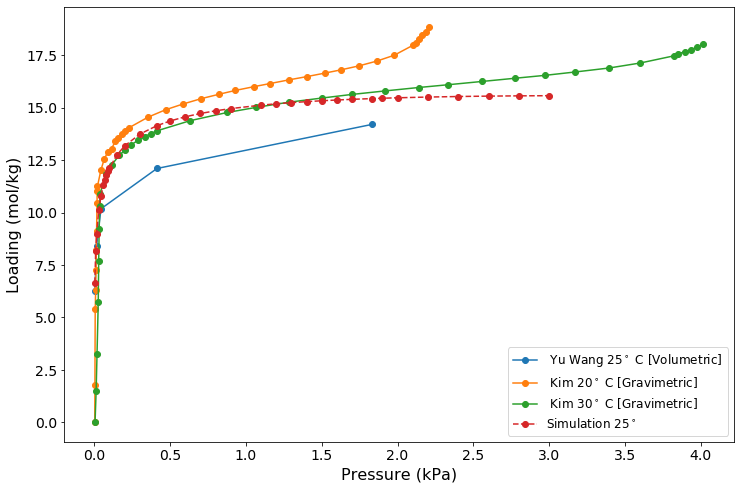

In [15]:
chart('Ws_188/')